# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you
will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [6]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


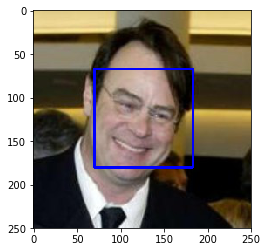

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

Answer:From the results below we observed that:
Percentage of the first 100 images in human_files that have a detected human face is: 98%
Percentage of the first 100 images in dog_files that have a detected human face is: 17%

In [9]:
#from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
detected_human_human_faces = 0
for img_path in human_files_short:
    if face_detector(img_path):
        detected_human_human_faces += 1
print(f"Percentage of the first 100 images in human_files that have a detected human face is: {detected_human_human_faces}%" )

detected_human_dog_faces = 0
for img_path in dog_files_short:
    if face_detector(img_path):
        detected_human_dog_faces += 1
print(f"Percentage of the first 100 images in dog_files that have a detected human face is: {detected_human_dog_faces}%" )

Percentage of the first 100 images in human_files that have a detected human face is: 98%
Percentage of the first 100 images in dog_files that have a detected human face is: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("cuda available:{0}".format(use_cuda))

cuda available:True


In [11]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print('CUDA is available! Training on GPU ...')
else:
    print('CUDA is not available. Training on CPU ...')

CUDA is available! Training on GPU ...


In [12]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [13]:
from PIL import Image
import torchvision.transforms as transforms

Type of the File/Image: <class 'PIL.JpegImagePlugin.JpegImageFile'>


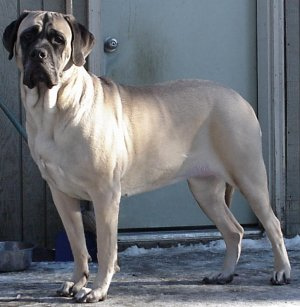

In [14]:
#Practice(for example)
IMG=Image.open(dog_files[1])
print('Type of the File/Image:',type(IMG))
IMG

In [15]:
#Image Pre-Processing
Preprocess=transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
Input_Tensor=Preprocess(IMG)
Input_Tensor.shape

torch.Size([3, 224, 224])

In [16]:
Final_Output_Tensor=Input_Tensor.unsqueeze(0)
Final_Output_Tensor.shape

torch.Size([1, 3, 224, 224])

In [17]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #Open The Image using PIL Libraries Image Module
    IMAGE=Image.open(img_path)
    
    #Image Pre-Processing Using Transforms Module of Pytorch
    PREPROCESS=transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
               transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    #Preprocess the Image By Passing the to PREPROCESS PIPELINE
    Tensor=PREPROCESS(IMAGE)
    
    #Unsqueeze The Tensor To a Mini Batch Image
    Input_Image=Tensor.unsqueeze(0)
    
    #Move the Image To GPU if it is Available 
    if torch.cuda.is_available():
        Input_Batch=Input_Image.to('cuda')
               
    #Predict The Class of the input Image Using the Pre-Trained Model VGG16
    #Freeze the Weights Since we are Not Training any of them (Fixed Feature extracter)
    
    ## activate eval mode
    VGG16.eval()
    
    with torch.no_grad():
        output=VGG16(Input_Batch)
                
        #Get the Predicted Class of the Model Using torch.max(output,1)[1].item()
        Final_output=torch.max(output,1)[1].item()
        
    VGG16.train()
    
    return Final_output # predicted class index    
    

In [18]:
#### Predictions
#Let's us check for the predicted image class in 'human_files' and 'dog_files_short' at the specified index/path: 
#Example:1
VGG16_predict(human_files[1])

456

In [19]:
#Example:2
VGG16_predict(dog_files_short[2])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [20]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx >= 151 and idx <= 268 # true/false

In [21]:
print(dog_detector(dog_files_short[0]))
print(dog_detector(human_files_short[0]))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

Answer: Percentage of human images in human_files_short that have a detected dog is: 0%
        Percentage of dog images in dog_short_files that have a detected dog is: 100%

In [22]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
detected_dogs_in_humans_files_VGG16 = 0
detected_dogs_in_dogs_files_VGG16 = 0

for img in range(100):
    if dog_detector(human_files_short[img]):
        detected_dogs_in_humans_files_VGG16 += 1
        print(f"This human ({img}) looks like a dog")
        human_dog_image = Image.open(human_files_short[img])
        plt.imshow(human_dog_image)
        plt.show()
    if dog_detector(dog_files_short[img]):
        detected_dogs_in_dogs_files_VGG16 +=1
        
print (f"Percentage of human images in human_files_short that have a detected dog with VGG16(pre-trained model) is: {detected_dogs_in_humans_files_VGG16}%")
print (f"Percentage of dog images in dog_short_files that have a detected dog with VGG16(pre-trained model) is: {detected_dogs_in_dogs_files_VGG16}%")

Percentage of human images in human_files_short that have a detected dog with VGG16(pre-trained model) is: 0%
Percentage of dog images in dog_short_files that have a detected dog with VGG16(pre-trained model) is: 100%


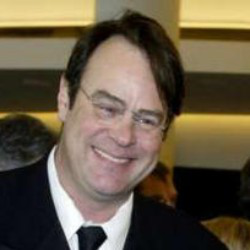

In [23]:
#Predictions
from PIL import Image
#Human_files_short
IMAGE=Image.open(human_files_short[0])
dog_detector(human_files_short[0])
IMAGE

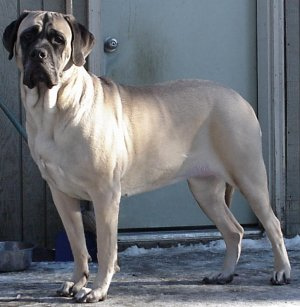

In [24]:
#Dog_Files_short
IMAGE=Image.open(dog_files_short[1])
dog_detector(dog_files_short[1])
IMAGE

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [25]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
#We also explore other pre-trained networks (such as Inception-v3, ResNet-50, etc).

#with ResNet-50 pre-trained network
ResNet50 = models.resnet50(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    ResNet50 = ResNet50.cuda()
    
detected_dogs_in_humans_files_ResNet50 = 0
detected_dogs_in_dogs_files_ResNet50 = 0

for img in range(100):
    if dog_detector(human_files_short[img]):
        detected_dogs_in_humans_files_ResNet50 += 1
        print(f"This human ({img}) looks like a dog")
        human_dog_image = Image.open(human_files_short[img])
        plt.imshow(human_dog_image)
        plt.show()
    if dog_detector(dog_files_short[img]):
        detected_dogs_in_dogs_files_ResNet50 +=1
        
print (f"Percentage of human images in human_files_short that have a detected dog with ResNet50(pre-trained model) is: {detected_dogs_in_humans_files_ResNet50}%")
print (f"Percentage of dog images in dog_short_files that have a detected dog with ResNet50(pre-trained model) is: {detected_dogs_in_dogs_files_ResNet50}%")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 70497113.93it/s]


Percentage of human images in human_files_short that have a detected dog with ResNet50(pre-trained model) is: 0%
Percentage of dog images in dog_short_files that have a detected dog with ResNet50(pre-trained model) is: 100%


In [26]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
#We also explore other pre-trained networks (such as Inception-v3, ResNet-50, etc).

#with Inception-v3 pre-trained network
InceptionV3 = models.inception_v3(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    InceptionV3 = InceptionV3.cuda()
    
detected_dogs_in_humans_files_InceptionV3 = 0
detected_dogs_in_dogs_files_InceptionV3 = 0

for img in range(100):
    if dog_detector(human_files_short[img]):
        detected_dogs_in_humans_files_InceptionV3 += 1
        print(f"This human ({img}) looks like a dog")
        human_dog_image = Image.open(human_files_short[img])
        plt.imshow(human_dog_image)
        plt.show()
    if dog_detector(dog_files_short[img]):
        detected_dogs_in_dogs_files_InceptionV3 +=1
        
print (f"Percentage of human images in human_files_short that have a detected dog with Inception-V3(pre-trained model) is: {detected_dogs_in_humans_files_InceptionV3}%")
print (f"Percentage of dog images in dog_short_files that have a detected dog with Inception-V3(pre-trained model) is: {detected_dogs_in_dogs_files_InceptionV3}%")

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 72573689.64it/s]


Percentage of human images in human_files_short that have a detected dog with Inception-V3(pre-trained model) is: 0%
Percentage of dog images in dog_short_files that have a detected dog with Inception-V3(pre-trained model) is: 100%


In [ ]:
Comparison of performance of 'dog detection' between various pretrained models:

In [ ]:
Percentage of dogs detected:

model          human_files_short       dog_files_short
VGG-16              0.0 %                 100.0%
ResNet-50           0.0 %                 100.0%
Inception-V3        0.0 %                 100.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [27]:
import os
from torchvision import datasets
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation and test sets
## Specify appropriate transforms and batch_sizes

# Setting the Parameters
param_transform_resize = 224
param_transform_crop = 224
param_data_directory = "/data/dog_images"

print("load image data ... ")
# define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(param_transform_resize),
                                       transforms.CenterCrop(param_transform_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(param_transform_resize),
                                      transforms.CenterCrop(param_transform_crop),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


# pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder( param_data_directory + '/train', transform=train_transforms )
test_data = datasets.ImageFolder( param_data_directory + '/test', transform=test_transforms )
valid_data = datasets.ImageFolder( param_data_directory + '/valid', transform=test_transforms )

# ---- print out some data stats ----
print('  Number of train images: ', len(train_data))
print('  Number of test images:  ', len(test_data))
print('  Number of valid images: ', len(valid_data))
# -----------------------------------

trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True, num_workers=0)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)

# create dictionary for all loaders in one
loaders_scratch = {}
loaders_scratch['train'] = trainloader
loaders_scratch['valid'] = validloader
loaders_scratch['test'] = testloader

print("done.")


load image data ... 
  Number of train images:  6680
  Number of test images:   836
  Number of valid images:  835
done.


In [28]:
# get classes of training data
class_names = train_data.classes
number_classes = len(class_names)

# correct output-size of the CNN
param_output_size = len(class_names)

print("Number of Dog Breed classes:", number_classes)
print("")
print("Dog Breed class names: \n", class_names)

Number of Dog Breed classes: 133

Dog Breed class names: 
 ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:Intially I loaded in the training,test and validation data thereby creating DataLoaders for each of these sets of data.For training data,I randomly cropped and resized all the images to 224x224 pixels which eventually resulted in 3x224x224
tensors.As it is a complicated task so it requires a deep neural network to achieve a good performance.

Before converting the images to tensors,Data augmentation was performed by using RandomHorizontalFlip with probability of default value and RandomRotation of degrees 10 in order to add more variation to the presentation,since identifying dog breeds should not be affected by how the images are present.Finally,the images are transformed into tensors and each color channel was normalized separately based on the provided Mean([0.485, 0.456, 0.406]) and standard deviations([0.229, 0.224, 0.225]) values.

For the validation and test datasets,I just resized all the images into the same size as like in the training dataset,and
converted them into tensors and normalized them.Conceptually,this was made consistent in such a way that the app is supposed to function thereby avoiding overfitting to some extent.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [29]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.Conv1=nn.Conv2d(3,16,3,padding=1)     # 16*224*224
        self.Conv2=nn.Conv2d(16,32,3,padding=1)    # 32*112*112
        self.Conv3=nn.Conv2d(32,64,3,padding=1)    # 64*56*56
        self.Conv4=nn.Conv2d(64,128,3,padding=1)   # 128*28*28
        self.Conv5=nn.Conv2d(128,256,3,padding=1)  # 256*14*14
        self.pool=nn.MaxPool2d(2,2)                # 16*112*112
        self.fc1=nn.Linear(12544,512)              # 28*28*16
        self.fc2=nn.Linear(512,512)
        self.fc3=nn.Linear(512,133)                # n_dog_breeds=133
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        ## Define forward behavior
        # First Convolutional Layer with ReLU activation,
        # then MaxPool2d to reduce dimension by 2,
        x=self.pool(F.relu(self.Conv1(x)))
        x=self.pool(F.relu(self.Conv2(x)))
        x=self.pool(F.relu(self.Conv3(x)))
        x=self.pool(F.relu(self.Conv4(x)))
        x=self.pool(F.relu(self.Conv5(x)))
        ##Flatten Fully Connected layers
        # Flatten image input --> 28*28 *16 = 12544
        x = x.view(-1, 12544)
        #First Fully Connected Network With Relu Activation Function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        #Second Fully Connected Network With Relu Activation Function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        #Third Fully Connected Network 
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [30]:
model_scratch

Net(
  (Conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.5)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

Answer:As with the data loaders,I decided to follow with reference to the original VGG16 paper (Simonyan K, Zisserman A 2015) for the neural network architecture.As the project requirements are to only achieve a 10% test accuracy and I took the simplest model from the VGG16 paper (Table 1, Column A) and tried to further simplify it.

I have chosen 5 Convolutional layers with a kernel size of 3x3 with a padding of 1,which gradually increases the number of feature maps,but keeps the size intact.In between every Convolutional layer,there is a Maxpool layer with a 2x2 kernel and a stride of 2, that halfs the size of all feature maps.After 5 Convolutions and Maxpool layers,we end up with 256 7x7 feature maps.

Then these feature maps were flattened to a vector of length 12544 and fed into the Fully Connected(FC) layers for classification.With reference to VGG16 paper I followed and have chosen 3 FC layers,but reduced the number of nodes per layer as we only have 133 classes,but not 1000.

A further deviation from the paper is that the last layer I have chosen in my network is a FC layer,and not a softmax layer. This is because for training,I used PyTorch's CrossEntropyLoss() class,that combines a log-softmax output-layer activation and a negative log-likelhood loss-function.

When testing the neural net,the output of the network is fed into a softmax function to obtain class probabilities.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [31]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [32]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear gradients of all optimized variables
            optimizer.zero_grad()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
          
            
        ######################    
        # validate the model #
        ######################
        model.eval()            # set model to evaluation mode
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
                   
    print("\ndone")
            
    # return trained model
    return model

param_epochs = 30

# train the model
model_scratch = train(param_epochs, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 
                      'model_scratch.pt')
                      
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.885510 	Validation Loss: 4.870619
Validation loss decreased (inf --> 4.870619). Saving model...
Epoch: 2 	Training Loss: 4.870295 	Validation Loss: 4.863818
Validation loss decreased (4.870619 --> 4.863818). Saving model...
Epoch: 3 	Training Loss: 4.787570 	Validation Loss: 4.672028
Validation loss decreased (4.863818 --> 4.672028). Saving model...
Epoch: 4 	Training Loss: 4.635511 	Validation Loss: 4.554218
Validation loss decreased (4.672028 --> 4.554218). Saving model...
Epoch: 5 	Training Loss: 4.548876 	Validation Loss: 4.461572
Validation loss decreased (4.554218 --> 4.461572). Saving model...
Epoch: 6 	Training Loss: 4.446148 	Validation Loss: 4.372323
Validation loss decreased (4.461572 --> 4.372323). Saving model...
Epoch: 7 	Training Loss: 4.304176 	Validation Loss: 4.235670
Validation loss decreased (4.372323 --> 4.235670). Saving model...
Epoch: 8 	Training Loss: 4.193961 	Validation Loss: 4.105062
Validation loss decreased (4.235670 --> 4.105062

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [33]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))
        

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.235126


Test Accuracy: 22% (191/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [34]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch
print(loaders_transfer)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f6142cca2e8>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f6142cca400>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f6142cca208>}


In [35]:
## TODO: Specify another data loaders
loaders_transfer_wec = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [36]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# download VGG16 pretrained model
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

# get the number of dog classes from the train_dataset
number_of_dog_classes = len(train_data.classes)
    
# Define dog breed classifier part of model_transfer
classifier = nn.Sequential(nn.Linear(25088, 4096),nn.ReLU(),nn.Dropout(0.5),nn.Linear(4096, 512), nn.ReLU(),nn.Dropout(0.5),
                           nn.Linear(512, number_of_dog_classes))
                                                                                                                                   
# Replace the original classifier with the dog breed classifier from above
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

In [37]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

model_transfer

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

Answer: To get my final CNN architecture in shape for transfer learning exercise part,I have chosen VGG16,which is a pre-trained model,extensively trained to identify the dog images(amongst other items) as it contains useful high level feature information in the later convolutional layers.

The reason behind in using this pre-trained model is due it's trained feature extraction which can impose it's training features/ability for 133 breeds of dogs that we are interested in.To avoid overtraining,the existing weights are frozen,this is especially important given the relatively small number of images as we have availablity to train the 133 breeds.

This is why I used the entire feature extractor part from the VGG16 pretrained model keeping the weights constant,and using dropout layers to avoid overfitting when training on a small new dataset (~7000 dog images).Then I have replaced the classifier part with my own dog breed classifier.

The drog breed classifier is modelled along the original VGG16 classifier with 3 fully connected layers and 2 dropout layers to reduce the number of parameters and then with 2 ReLU activations.

The final step is to replace the final fully connected layer of the classifier to match the number of dog breeds we are looking to identify (133).This is simply done by replacing the last layer with one that has 'out_features' set to 133.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [38]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model
#model_transfer = train(param_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [39]:
# Training the model again
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):

    valid_loss_min = np.Inf
    
    print(f"Batch Size: {loaders['train'].batch_size}\n")
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        # train the model
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if (batch_idx + 1) % 5 == 0:
                print(f'Epoch:{epoch}/{n_epochs} \tBatch:{batch_idx + 1}')
                print(f'Train Loss: {train_loss}\n')

        # validate the model
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    print("\nDone")
            
    # return trained model
    return model

# train the model again with 15 Epochs
model_transfer = train(15, loaders_transfer, model_transfer, optimizer_transfer,criterion_transfer, use_cuda,
                       'model_transfer.pt')                        

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Batch Size: 128

Epoch:1/15 	Batch:5
Train Loss: 6.756866931915283

Epoch:1/15 	Batch:10
Train Loss: 5.856757640838623

Epoch:1/15 	Batch:15
Train Loss: 5.5139970779418945

Epoch:1/15 	Batch:20
Train Loss: 5.322765350341797

Epoch:1/15 	Batch:25
Train Loss: 5.180280685424805

Epoch:1/15 	Batch:30
Train Loss: 5.063120365142822

Epoch:1/15 	Batch:35
Train Loss: 4.954051971435547

Epoch:1/15 	Batch:40
Train Loss: 4.86618709564209

Epoch:1/15 	Batch:45
Train Loss: 4.757715702056885

Epoch:1/15 	Batch:50
Train Loss: 4.65518045425415

Epoch: 1 	Training Loss: 4.599111 	Validation Loss: 2.920180
Validation loss decreased (inf --> 2.920180). Saving model...
Epoch:2/15 	Batch:5
Train Loss: 3.4494080543518066

Epoch:2/15 	Batch:10
Train Loss: 3.330418825149536

Epoch:2/15 	Batch:15
Train Loss: 3.2687041759490967

Epoch:2/15 	Batch:20
Train Loss: 3.1857290267944336

Epoch:2/15 	Batch:25
Train Loss: 3.0989527702331543

Epoch:2/15 	Batch:30
Train Loss: 3.0440149307250977

Epoch:2/15 	Batch:35
Train

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [40]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)       
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        output = F.softmax(output, dim=1)
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))


test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.695126


Test Accuracy: 78% (655/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [41]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)

    # Define normalization step for image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),std=(0.229, 0.224, 0.225))
                                     
    # Define transformations of image
    preprocess = transforms.Compose([transforms.Resize(258),transforms.CenterCrop(224),transforms.ToTensor(),normalize])
                                                                  
    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = preprocess(img).unsqueeze_(0)

    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    ## Inference
    # Turn on evaluation mode
    model_transfer.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        # get sample outputs
        output = model_transfer(img_tensor)
        # convert output probabilities to predicted class
        prediction = torch.argmax(output).item()
        
    # Turn off evaluation mode
    model_transfer.train()
    
    # Use prediction to get dog breed
    breed = class_names[prediction]
    return breed

In [42]:
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

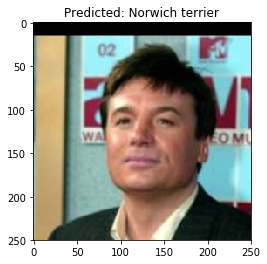

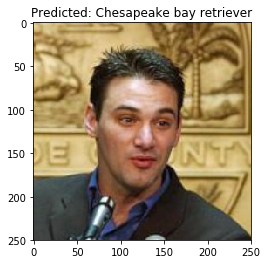

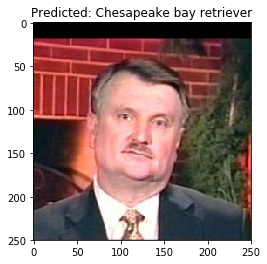

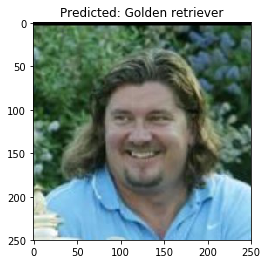

In [43]:
# try out the function
import random
from PIL import Image, ImageFile 

for image in random.sample(list(human_files_short), 4): 
    predicted_breed = predict_breed_transfer(image)
    display_image(image, title="Predicted: {}".format(predicted_breed))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [44]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog and neither
    
    # check if image has human faces:
    if (face_detector(img_path)):
        print("Hello Human!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("You look like a ...")
        print(predicted_breed)
        
    # check if image has dogs:
    elif dog_detector(img_path):
        print("Hello Dog!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title="Predicted: {}".format(predicted_breed) )
        
        print("Your breed is most likley ...")
        print(predicted_breed)
        
    # otherwise
    else:
        print("Oh, we're sorry! We couldn't detect any dog or human face in the image.")
        display_image(img_path, title="...")
        print("Try another!")
        
    print("\n")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

Answer:The output is better than I expected as I was very impressed by how the algorithm was able to classify the dog breeds correctly.

I would like to improve my algorithm in the followings ways:

1.Support for multiple breeds to be identified in a photo of mutiple dogs.
2.Show the confidence of prediction to the user.
3.Identify both human and dog faces and indicate a possible count of faces and dogs in the picture.
4.More iterations can train the network better and can get better weights that can better fit a larger subset of data.
6.Hyper-parameter tunings like weight initializings, learning rates, drop-outs, batch_sizes, and optimizers will be helpful to improve performances.
7.More image augumentation trials can be implemented to improve performance on test data.

Hello Human!


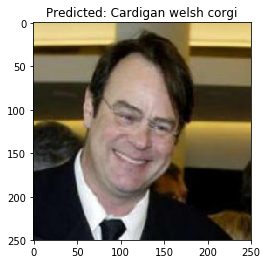

You look like a ...
Cardigan welsh corgi


Hello Human!


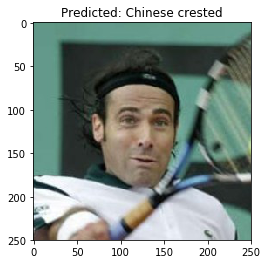

You look like a ...
Chinese crested


Hello Human!


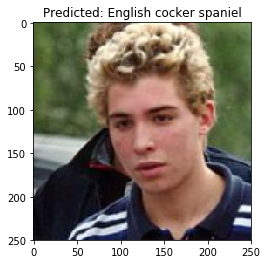

You look like a ...
English cocker spaniel


Hello Human!


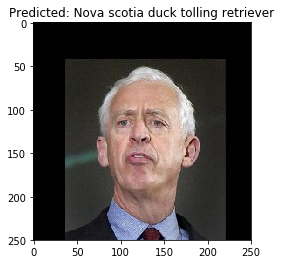

You look like a ...
Nova scotia duck tolling retriever


Hello Human!


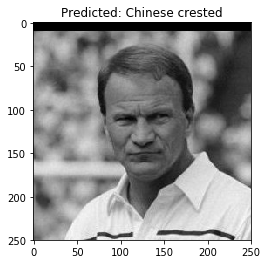

You look like a ...
Chinese crested


Hello Human!


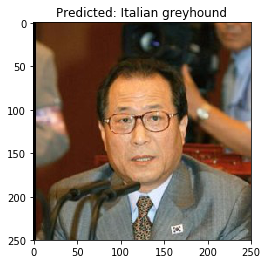

You look like a ...
Italian greyhound


Hello Human!


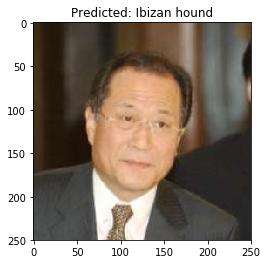

You look like a ...
Ibizan hound


Hello Human!


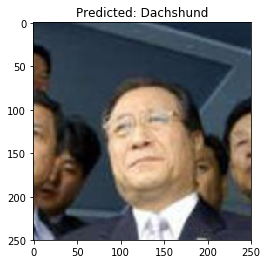

You look like a ...
Dachshund


Hello Human!


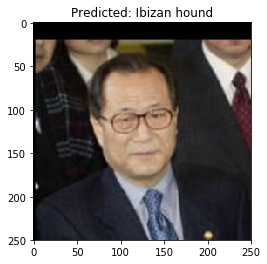

You look like a ...
Ibizan hound


Hello Human!


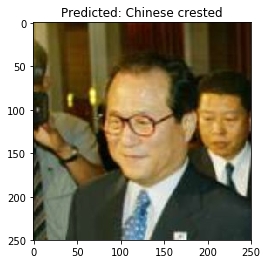

You look like a ...
Chinese crested


Hello Dog!


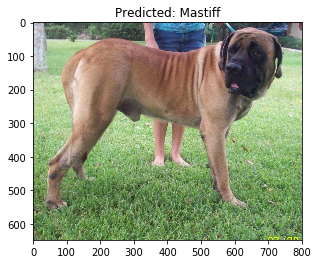

Your breed is most likley ...
Mastiff


Hello Dog!


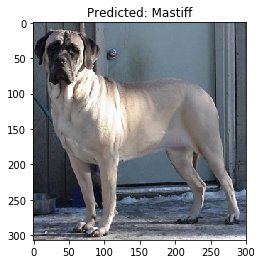

Your breed is most likley ...
Mastiff


Hello Dog!


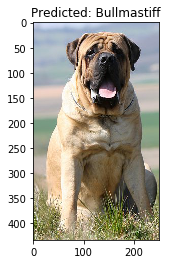

Your breed is most likley ...
Bullmastiff


Hello Dog!


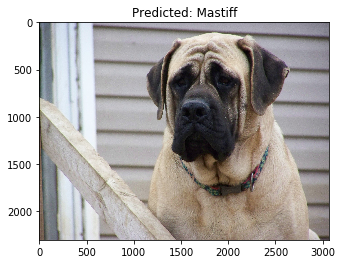

Your breed is most likley ...
Mastiff


Hello Dog!


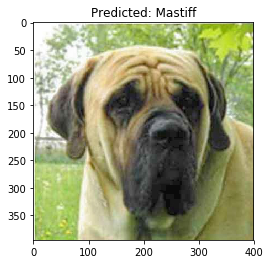

Your breed is most likley ...
Mastiff


Hello Dog!


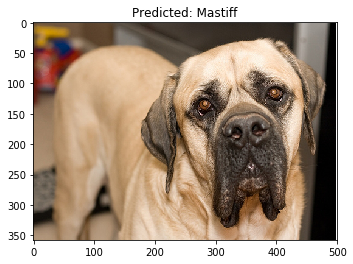

Your breed is most likley ...
Mastiff


Hello Dog!


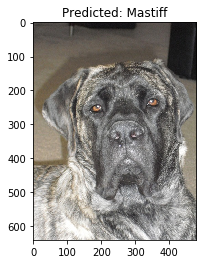

Your breed is most likley ...
Mastiff


Hello Dog!


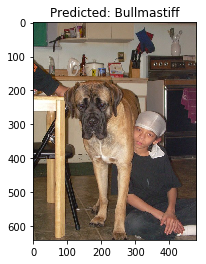

Your breed is most likley ...
Bullmastiff


Hello Dog!


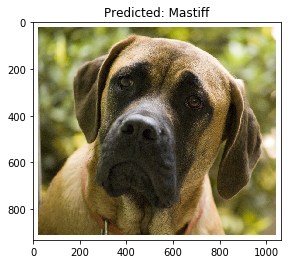

Your breed is most likley ...
Mastiff


Hello Dog!


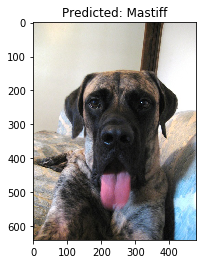

Your breed is most likley ...
Mastiff




In [45]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:10], dog_files[:10])):
    run_app(file)